<a href="https://colab.research.google.com/github/AmruthaA27/Pandas_Task_UserEngagement/blob/main/Assignment3_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv

df1 = pd.read_csv("takehome_users.csv",encoding='latin-1')
df2 = pd.read_csv('takehome_user_engagement.csv')
df3 = pd.read_csv('User_Engagement_fianl.csv',encoding='latin-1')


In [2]:
user_login_count = df3.groupby(['user_id']).size()
print(user_login_count)

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Length: 8823, dtype: int64


In [3]:
#to find present adopted users
from datetime import datetime, timedelta
df4 = df3[['user_id', 'time_stamp']].copy()
Adopted_dict = {}
x = timedelta(days = 7)
#x = '7 days 00:00:00'
print(x)
for i in range(1,12000):
  #print(i)
  df5 = df4[df4['user_id']==i]
  timeSeries = pd.to_datetime(df5['time_stamp'].tolist())
  #print(timeSeries)
  y = len(timeSeries)
  if len(timeSeries)>=3:
    for j in range(0,y-2):
      diff = timeSeries[j+2]-timeSeries[j]
      #print(diff)
      if diff<= x:
       Adopted_dict[i] = 'Adopted'
       break
print(Adopted_dict)

adopted_users = list(Adopted_dict.keys())
print(adopted_users)
print(len(adopted_users))


7 days, 0:00:00
{2: 'Adopted', 10: 'Adopted', 20: 'Adopted', 33: 'Adopted', 42: 'Adopted', 43: 'Adopted', 50: 'Adopted', 53: 'Adopted', 60: 'Adopted', 63: 'Adopted', 69: 'Adopted', 74: 'Adopted', 80: 'Adopted', 81: 'Adopted', 82: 'Adopted', 87: 'Adopted', 133: 'Adopted', 135: 'Adopted', 141: 'Adopted', 146: 'Adopted', 153: 'Adopted', 160: 'Adopted', 165: 'Adopted', 168: 'Adopted', 172: 'Adopted', 174: 'Adopted', 185: 'Adopted', 188: 'Adopted', 197: 'Adopted', 200: 'Adopted', 202: 'Adopted', 203: 'Adopted', 209: 'Adopted', 214: 'Adopted', 230: 'Adopted', 245: 'Adopted', 247: 'Adopted', 263: 'Adopted', 265: 'Adopted', 275: 'Adopted', 280: 'Adopted', 283: 'Adopted', 297: 'Adopted', 298: 'Adopted', 305: 'Adopted', 310: 'Adopted', 311: 'Adopted', 321: 'Adopted', 322: 'Adopted', 341: 'Adopted', 345: 'Adopted', 347: 'Adopted', 351: 'Adopted', 362: 'Adopted', 363: 'Adopted', 370: 'Adopted', 383: 'Adopted', 397: 'Adopted', 401: 'Adopted', 418: 'Adopted', 430: 'Adopted', 445: 'Adopted', 450: 'Ad

In [4]:
df_adopted = pd.DataFrame(adopted_users,columns = ['object_id'])
#print(df_adopted)

final_adopted = pd.merge(df_adopted, df1, on ='object_id', how ='inner')
print(final_adopted.head(5))

   object_id     creation_time            name                          email  \
0          2   11/15/2013 3:45   Poole Matthew         MatthewPoole@gustr.com   
1         10   1/16/2013 22:08    Santos Carla  CarlaFerreiraSantos@gustr.com   
2         20    3/6/2014 11:46   Helms Mikayla             lqyvjilf@uhzdq.com   
3         33    3/11/2014 6:29     Araujo José     JoseMartinsAraujo@cuvox.de   
4         42  11/11/2012 19:05  Pinto Giovanna    GiovannaCunhaPinto@cuvox.de   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0      ORG_INVITE                1.396238e+09                         0   
1      ORG_INVITE                1.401833e+09                         1   
2          SIGNUP                1.401364e+09                         0   
3    GUEST_INVITE                1.401518e+09                         0   
4          SIGNUP                1.401045e+09                         1   

   enabled_for_marketing_drip  org_id  invited_by_user_id  
0 

ORG_INVITE            574
GUEST_INVITE          369
SIGNUP                302
SIGNUP_GOOGLE_AUTH    239
PERSONAL_PROJECTS     172
Name: creation_source, dtype: int64


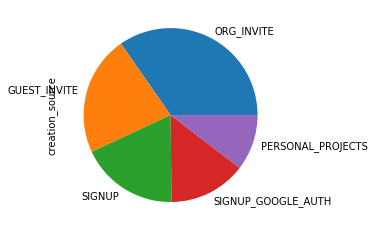

In [5]:
# relation between Creation_source and Adoption
based_creation_src = final_adopted['creation_source'].value_counts()
print(based_creation_src)
based_creation_src.plot(kind = 'pie')


*   Total no. of users = 12000
*   total no. of adopted users = 1656

**Of all the existing adopted users, more than 50% are created by Org_invite or Guest_invite. Hence, future users being created by Org_invite/Guest_invite are more likely to become adopted**

In [10]:
#relation between opted_in_to_mailing_list and adoption
based_opted_mailing = final_adopted['opted_in_to_mailing_list'].value_counts()
print(based_opted_mailing)
based_marketing_drip = final_adopted['enabled_for_marketing_drip'].value_counts()
print(based_marketing_drip)
final_adopted[(final_adopted['opted_in_to_mailing_list'] == 1) | (final_adopted['enabled_for_marketing_drip'] == 1)]


0    1227
1     429
Name: opted_in_to_mailing_list, dtype: int64
0    1399
1     257
Name: enabled_for_marketing_drip, dtype: int64


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,10,1/16/2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
4,42,11/11/2012 19:05,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
12,80,2/28/2014 21:30,Silva Samuel,SamuelBarbosaSilva@jourrapide.com,ORG_INVITE,1.399239e+09,1,1,49,238.0
13,81,6/26/2013 3:57,Cardoso Rafael,RafaelCostaCardoso@yahoo.com,PERSONAL_PROJECTS,1.401249e+09,1,0,185,NaN
15,87,9/11/2013 22:53,Martins Isabela,IsabelaAzevedoMartins@jourrapide.com,SIGNUP,1.400799e+09,1,0,26,NaN
...,...,...,...,...,...,...,...,...,...,...
1642,11913,1/30/2014 5:50,Woolcock Sam,mlwzirju@xdxgl.com,SIGNUP,1.400738e+09,1,1,38,NaN
1647,11958,5/25/2013 6:28,Leake Taj,TajLeake@gmail.com,SIGNUP,1.400049e+09,1,0,176,NaN
1648,11959,9/24/2012 23:34,Walsh Aidan,AidanWalsh@cuvox.de,GUEST_INVITE,1.401666e+09,1,1,105,5093.0
1653,11969,6/1/2013 0:48,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0




*   no. of adopted users who opted for both email and marketing drip = 196
*   no. of adopted users who opted for either of it = 490
**No conclusive influence of these behaviors on future users becoming adopted**



In [15]:
#relation between Org_id and adoption
based_org_id = final_adopted['org_id'].value_counts()
df_based_org_id = pd.DataFrame(based_org_id)
users_org_id = df1['org_id'].value_counts()
df_users_org_id = pd.DataFrame(users_org_id)
#print(based_org_id)
#print(users_org_id)

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64


No clear relation between Org_id and users' adoption